# How to apply Principal Component Analysis

A Jupyter library for reference on how to apply PCA on a dataset

### 1. Load the libraries/modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

### 2. Load the dataset

In [ ]:
wine_quality = fetch_openml(name="wine-quality-red", version=1, as_frame=True)

In [3]:
wine_quality.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
print(wine_quality['DESCR'])

wine-quality-red-pmlb

Downloaded from openml.org.


In [5]:
wine_quality['details']

{'id': '40691',
 'name': 'wine-quality-red',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2017-04-06T12:14:58',
 'licence': 'public',
 'url': 'https://api.openml.org/data/v1/download/4965268/wine-quality-red.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset40691/dataset_40691.pq',
 'file_id': '4965268',
 'default_target_attribute': 'class',
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset40691/dataset_40691.pq',
 'status': 'active',
 'processing_date': '2018-10-04 07:19:40',
 'md5_checksum': '789d107119b4bbdc8ae5a4f213af7542'}

### 3. Transform the dataset into a DataFrame

In [6]:
data = wine_quality['data']
target = wine_quality['target']

df = pd.DataFrame(data=data)

### 4. Exploratory Data Analysis

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


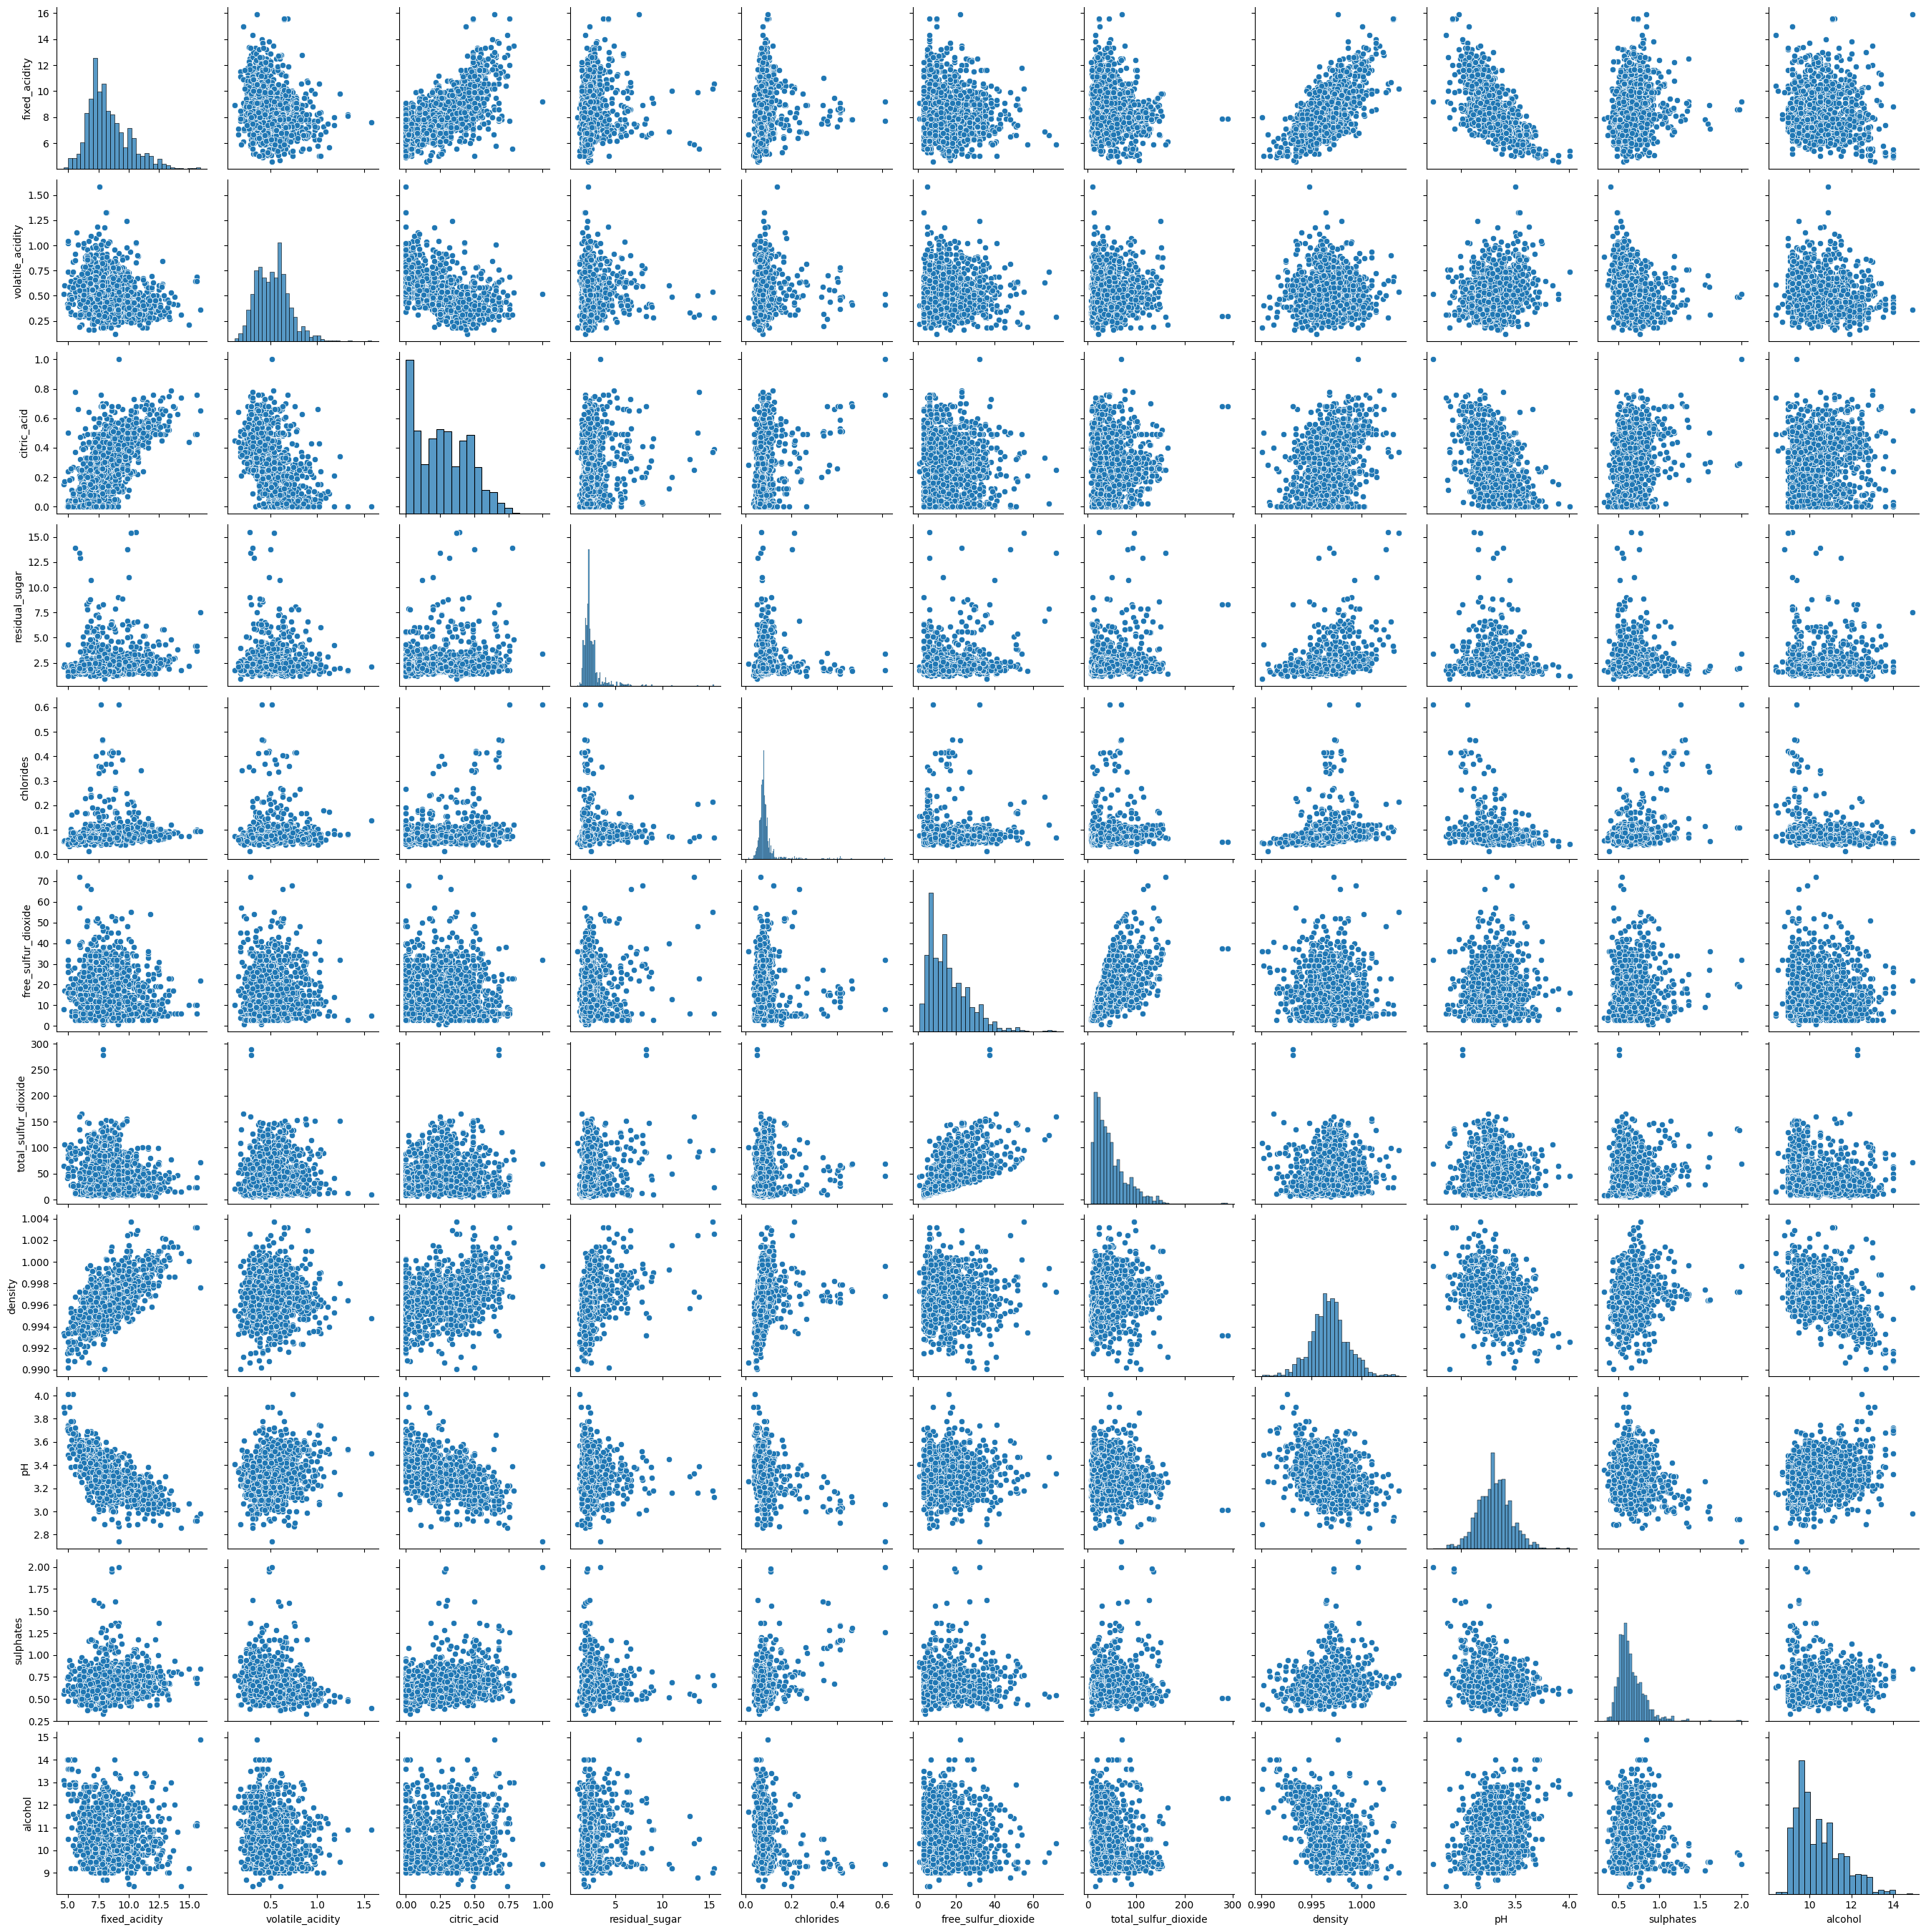

In [10]:
sns.pairplot(df)

Text(0.05, 0.9, "Pearson's R: 0.6680\np-value: 3.07e-207")

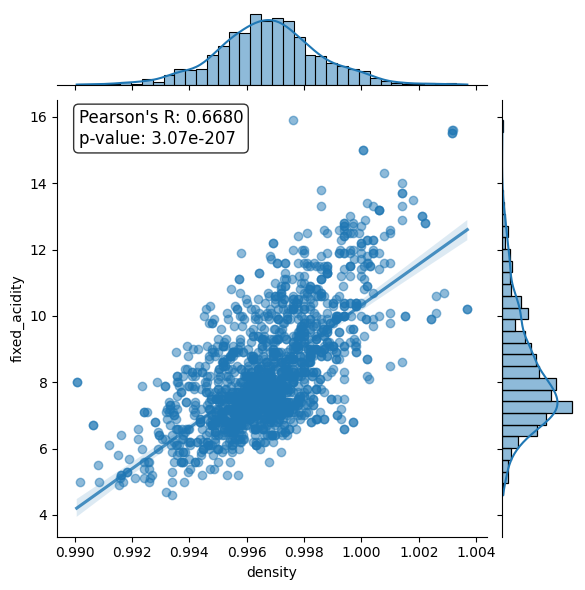

In [11]:
from scipy.stats import pearsonr

x = 'density'
y = 'fixed_acidity'

jp = sns.jointplot(data=df, x=x, y=y, kind='reg', scatter_kws={"alpha": 0.5}, line_kws={"alpha": 0.8})
pearson_r, p_value = pearsonr(df[x], df[y])

jp.ax_joint.annotate(
    f"Pearson's R: {pearson_r:.4f}\np-value: {p_value:.2e}",
    xy=(0.05, 0.9),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)

Text(0.6, 0.9, "Pearson's R: -0.6830\np-value: 4.06e-220")

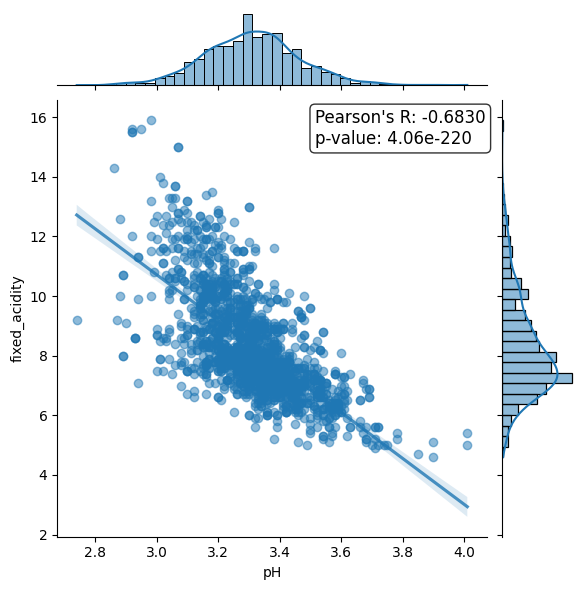

In [12]:
x = 'pH'
y = 'fixed_acidity'

jp = sns.jointplot(data=df, x=x, y=y, kind='reg', scatter_kws={"alpha": 0.5}, line_kws={"alpha": 0.8})
pearson_r, p_value = pearsonr(df[x], df[y])

jp.ax_joint.annotate(
    f"Pearson's R: {pearson_r:.4f}\np-value: {p_value:.2e}",
    xy=(0.6, 0.9),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)

Text(0.05, 0.9, "Pearson's R: 0.6677\np-value: 6.40e-207")

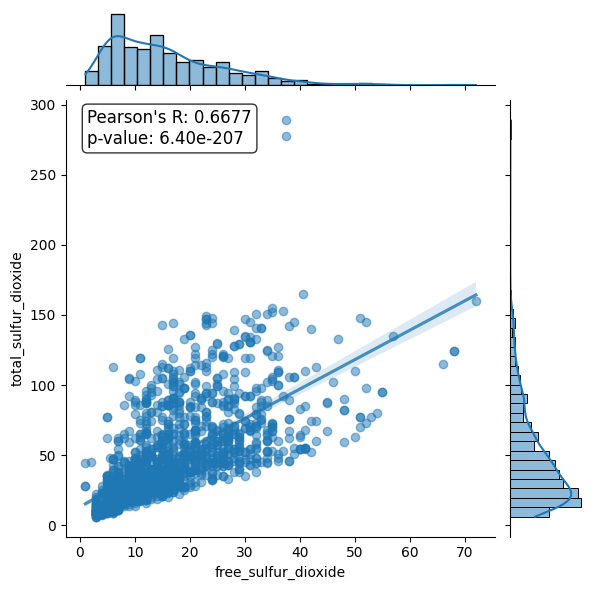

In [13]:
x = 'free_sulfur_dioxide'
y = 'total_sulfur_dioxide'

jp = sns.jointplot(data=df, x=x, y=y, kind='reg', scatter_kws={"alpha": 0.5}, line_kws={"alpha": 0.8})
pearson_r, p_value = pearsonr(df[x], df[y])

jp.ax_joint.annotate(
    f"Pearson's R: {pearson_r:.4f}\np-value: {p_value:.2e}",
    xy=(0.05, 0.9),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)

Text(0.05, 0.9, "Pearson's R: -0.4962\np-value: 3.94e-100")

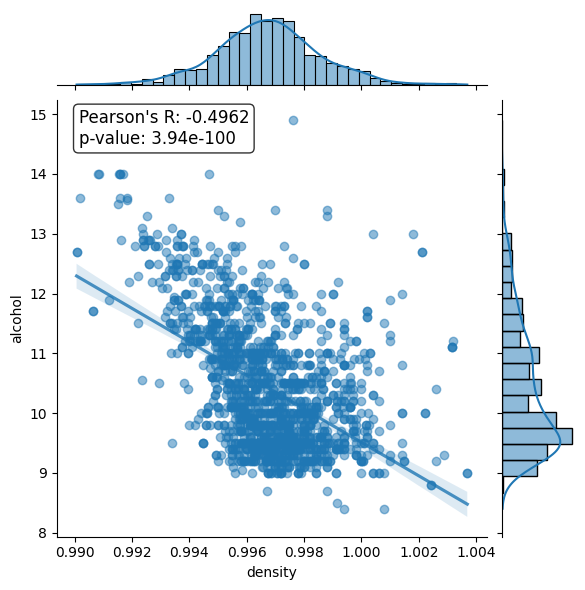

In [14]:
x = 'density'
y = 'alcohol'

jp = sns.jointplot(data=df, x=x, y=y, kind='reg', scatter_kws={"alpha": 0.5}, line_kws={"alpha": 0.8})
pearson_r, p_value = pearsonr(df[x], df[y])

jp.ax_joint.annotate(
    f"Pearson's R: {pearson_r:.4f}\np-value: {p_value:.2e}",
    xy=(0.05, 0.9),
    xycoords="axes fraction",
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.8)
)

### 5. Standardize the dataset

In [15]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [16]:
scaled_data = scaler.transform(df)

### 6. Set model, fit, and transform the data

In [17]:
pca = PCA(n_components=2)

In [18]:
pca.fit(scaled_data)

PCA(n_components=2)

In [19]:
x_pca = pca.transform(scaled_data)

In [20]:
print(f'The shape of scaled data is: {scaled_data.shape}')
print()
print(f'The shape of transformed data is: {x_pca.shape}')

The shape of scaled data is: (1599, 11)

The shape of transformed data is: (1599, 2)


### 7. Visualize the components

In [21]:
wine_quality['target']

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: class, Length: 1599, dtype: category
Categories (6, object): ['3', '4', '5', '6', '7', '8']

In [22]:
bins = [2, 5, 8]
labels = ['Low', 'High']

binary_target = pd.cut(wine_quality['target'].astype(int), bins=bins, labels=labels)

binary_target.head()

0     Low
1     Low
2     Low
3    High
4     Low
Name: class, dtype: category
Categories (2, object): ['Low' < 'High']

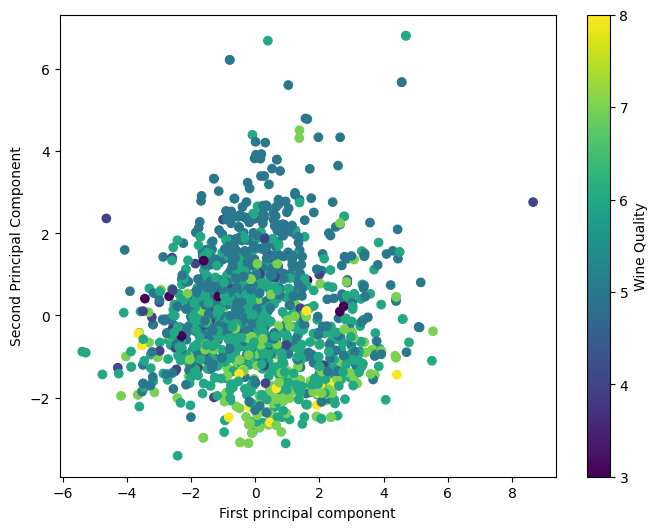

In [23]:
target_int = wine_quality['target'].astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=target_int, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Wine Quality')

[Text(1, 0, 'Low'), Text(1, 1, 'High')]

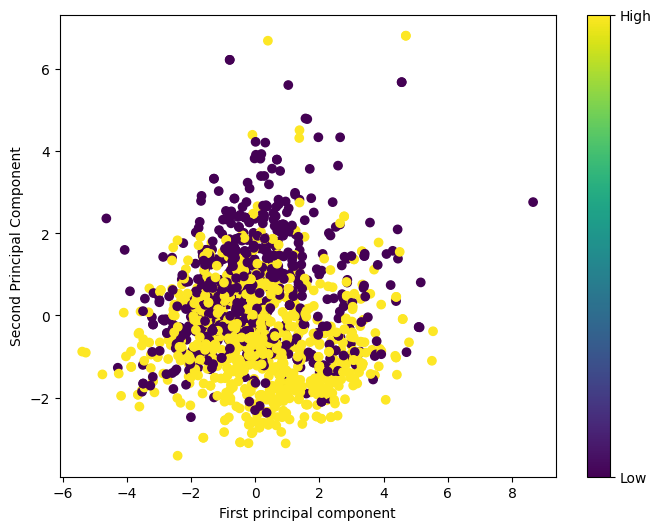

In [24]:
binary_target_int = binary_target.cat.codes

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=binary_target_int, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(labels)

### 8. Extra step: check what is the ideal number of components for this dataset

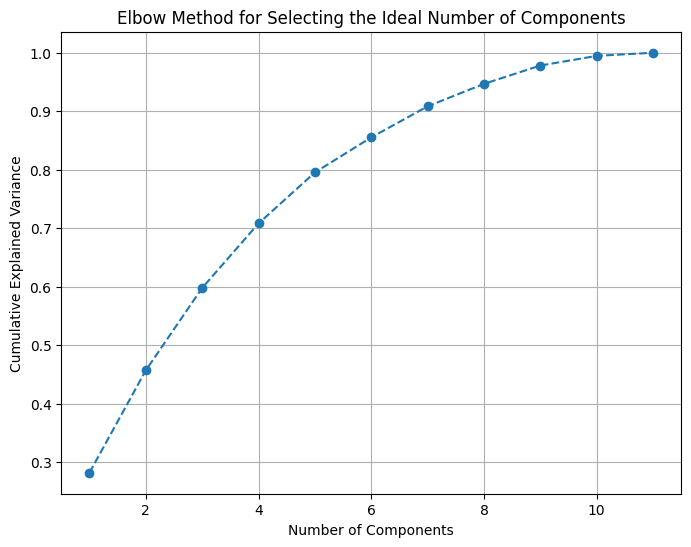

In [25]:
pca_range = range(1, scaled_data.shape[1] + 1)
explained_variance = []

for n in pca_range:
    pca = PCA(n_components=n)
    pca.fit(scaled_data)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# plot explained variance ratio against the number of components
plt.figure(figsize=(8, 6))
plt.plot(pca_range, explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Method for Selecting the Ideal Number of Components')
plt.grid(True)

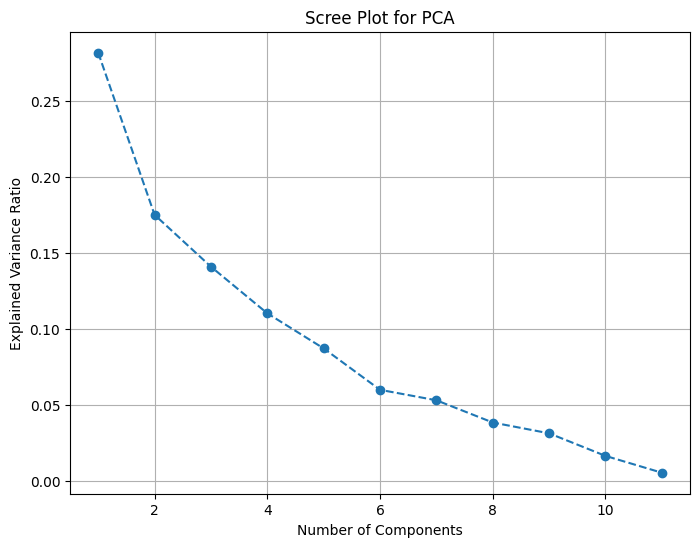

In [26]:
pca = PCA()
pca.fit(scaled_data)

# extract explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# scree plot
plt.figure(figsize=(8, 6))
plt.plot(pca_range, explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(True)

In [27]:
# redoing, now with 6 components
pca = PCA(n_components=6)

In [28]:
pca.fit(scaled_data)

PCA(n_components=6)

In [29]:
x_pca = pca.transform(scaled_data)

In [30]:
print(f'The shape of scaled data is: {scaled_data.shape}')
print()
print(f'The shape of transformed data is: {x_pca.shape}')

The shape of scaled data is: (1599, 11)

The shape of transformed data is: (1599, 6)


In [31]:
bins = [2, 5, 8]
labels = ['Low', 'High']

binary_target = pd.cut(wine_quality['target'].astype(int), bins=bins, labels=labels)

binary_target.head()

0     Low
1     Low
2     Low
3    High
4     Low
Name: class, dtype: category
Categories (2, object): ['Low' < 'High']

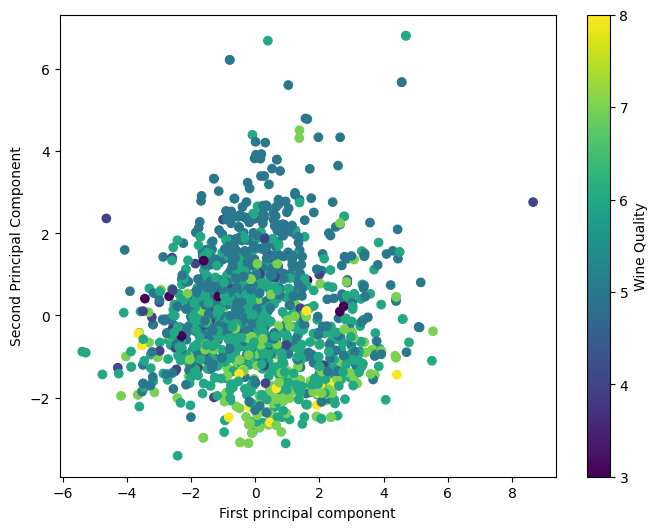

In [32]:
target_int = wine_quality['target'].astype(int)

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=target_int, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Wine Quality')

[Text(1, 0, 'Low'), Text(1, 1, 'High')]

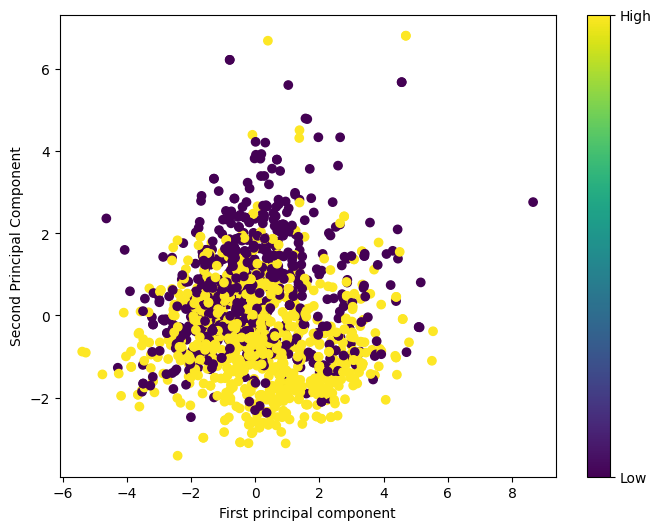

In [33]:
binary_target_int = binary_target.cat.codes

plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=binary_target_int, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

cbar = plt.colorbar(ticks=[0, 1])
cbar.ax.set_yticklabels(labels)

Text(0.5, 0.92, 'Three Principal Components')

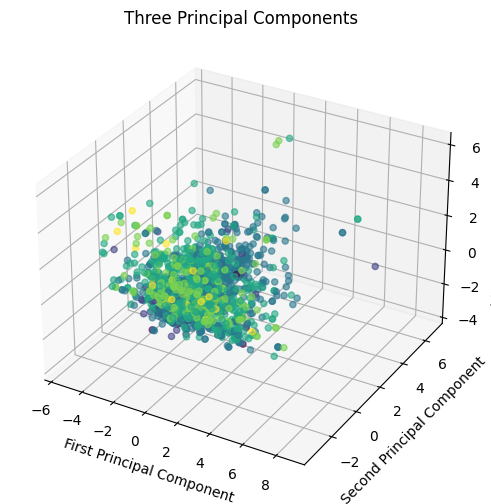

In [34]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=target.astype(int), cmap='viridis', alpha=0.6)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('Three Principal Components')

Text(0.5, 0.92, 'Three Principal Components')

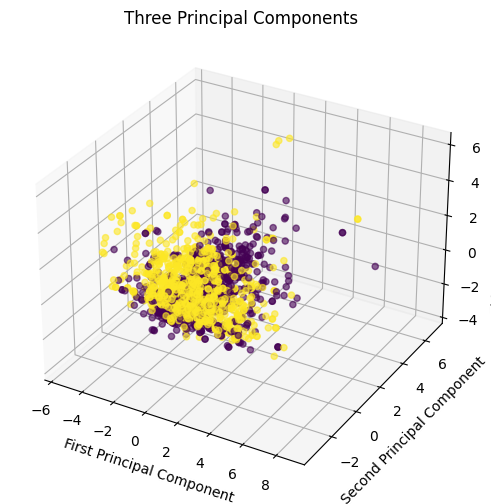

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=binary_target_int, cmap='viridis', alpha=0.6)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title('Three Principal Components')

### 8. Interpret the components

It was to be honest not the best choice of dataset due to it having many categories in its label. But it was still a good exercise, showing how "muddled" wine quality can be (and how in Portugal, bad quality wine is oftentimes an outlier!).